# Detecting Tanzanian Water Wells in Need of Repair

January 3rd, 2020

Report by Karen Warmbein, Aaron Abrahamson, and Hunter Ewing. 


______

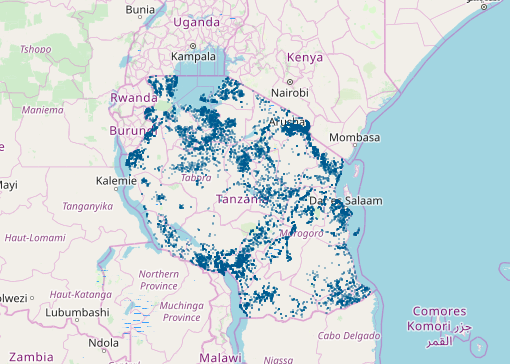

Our project was aimed at helping the Tanzanian government (and support organizations) detect when a water well will be in need of repair. This is a substantial issue in Tanzania as it experiences severe dry seasons, and most of the population lives in rural communities. Detecting when a well is in need of repair is of utmost importance to properly allocate limited resources.

We performed engineering on the target classes, turning both "non functional" and "functional needs repairs" into one target: "needs repairs."

We performed a thorough EDA of the dataset, and built several models to detect if a water well is in need of repairs. We tried 5 different classification models, settling on a Random Forest Classifier as the best performer. It had a higher overall F1 Score, as well as the best recall for the 'Needs Repair' category. Higher recall means less false negatives - we believe that this is the best method to evaluate the model as a false negative (a well that needs repairs being labeled as not needing repairs could have devastating effects to a local community - a well that does not need repairs being labeled as such, while being a waste of resources, would not have nearly as drastic of an effect).

### Load data and necessary packages

In [1]:
%load_ext autoreload
%autoreload 2
from src.utilities import functions_used as func
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
features = pd.read_csv(func.get_raw_csv_file_path("training-set-values.csv"))
targets = pd.read_csv(func.get_raw_csv_file_path("training-labels.csv"))
test_set = pd.read_csv(func.get_raw_csv_file_path("test-set.csv"))

### Prepare data for modeling

Clean, format, split, and preprocess the data in preparation for modeling with a random forest classifier

In [3]:
# This changes the target 'non functional' and 'functional needs repair' into 'needs repair'
targets['status_group'] = targets['status_group'].map({'non functional':'needs repair',
                                                       'functional needs repair':'needs repair',
                                                       'functional':'functional'})

In [4]:
# list of features used
features_list = ['basin', 'region', 'scheme_management', 'scheme_name',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'waterpoint_type','gps_height', 'longitude', 'latitude', 
       'region_code', 'district_code', 'population', 'construction_year', 'status_group']   

In [5]:
# Initialize a One Hot Encoder object (fitted on train, transforms train and test)
ohe = OneHotEncoder(handle_unknown = 'ignore')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=42)

# Preprocess train and test data
X_train, y_train = func.model_preprocessing(X_train, y_train, features_list, ohe, train = True)
X_test, y_test = func.model_preprocessing(X_test, y_test, features_list, ohe, train=False)

### Fit model and make predictions

In [6]:
# Initialize a Random Forest Classifier Object
rfc = RandomForestClassifier(n_estimators=50, random_state=42, bootstrap=True, max_depth = 50)

# Fit training data to the object
rfc.fit(X_train, y_train)

# Make predictions on trained model
rfc_predicts = rfc.predict(X_test)

### Evaluate model performance

In [7]:
# Score the model
rfc.score(X_test, y_test)

0.8200598177644849

In [8]:
# Display classification metrics
print(classification_report(y_test,rfc_predicts))

              precision    recall  f1-score   support

  functional       0.82      0.86      0.84      7862
needs repair       0.82      0.77      0.79      6515

    accuracy                           0.82     14377
   macro avg       0.82      0.82      0.82     14377
weighted avg       0.82      0.82      0.82     14377



In [9]:
print(f'Accuracy is: {accuracy_score(y_test, rfc_predicts)*100}')

Accuracy is: 82.0059817764485


In [10]:
confusion_matrix(y_test, rfc_predicts)

array([[6780, 1082],
       [1505, 5010]])

Plot the confusion matrix

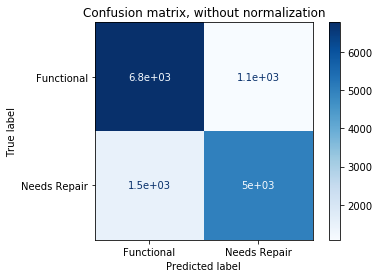

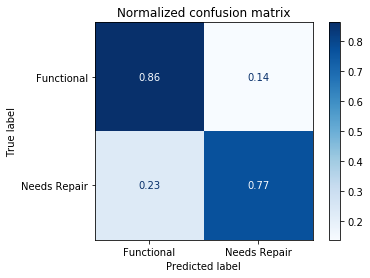

In [11]:
func.plot_matrix(rfc, X_test, y_test)

### Final Results

Our random forest classifier model had an 82% accuracy overall, with an F1-Score for the True Functional label of 84% and 79% for the True Needs Repair label. The metric best for our business case, True Needs Repair Recall, performed the worst, unfortunately, at 77%. While this is still a good predictive model, if given more time we would like to perform more feature engineering to increase this recall score.